In [2]:
import pandas as pd
import seaborn as sns
%pylab inline

/Users/steffena/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


# Excercises

* how many districts represented?
* clean the umlauts in bezirk_name
* what is the district with the most kids of age <=5 years?
* where do the most retired persons live?
* what is the district with the highest total population?
* plot the histogram of number of german people from 0 till <20 across all districts

In [30]:
# load data, beware the seperator
data = pd.read_csv('../data/EWR_Ortsteile_2015-12-31.csv', sep = ';', decimal = ',')

In [31]:
# clean columns manually
data.columns = ['bezirk','bezirk_name','ortsteil','ortsteil_name','geschlecht','staatsangehoerigkeit','altersgruppe','haeufigkeit']

In [32]:
# how many bezirke?
data.bezirk_name.unique()

array(['Mitte', 'Friedrichshain-Kreuzberg', 'Pankow',
       'Charlottenburg-Wilmersdorf', 'Spandau', 'Steglitz-Zehlendorf',
       'Tempelhof-Sch\xf6neberg', 'Neuk\xf6lln', 'Treptow-K\xf6penick',
       'Marzahn-Hellersdorf', 'Lichtenberg', 'Reinickendorf'], dtype=object)

In [33]:
# clean the umlauts using data.bezirk_name.str.replace
data.bezirk_name = data.bezirk_name.str.replace('\xf6','oe')
data.bezirk_name = data.bezirk_name.str.replace('\xf6','oe')

In [36]:
# what is the bezirk with the most kids of age <=5 years? 
# groupby and apply with lambda returning x.haeufigkeit.sum
data.query('altersgruppe == "00_05"').groupby('bezirk_name').apply(lambda x: x.haeufigkeit.sum())

bezirk_name
Charlottenburg-Wilmersdorf    12877.0
Friedrichshain-Kreuzberg      14883.0
Lichtenberg                   14176.0
Marzahn-Hellersdorf           13514.0
Mitte                         18783.0
Neukoelln                     16744.0
Pankow                        22475.0
Reinickendorf                 11862.0
Spandau                       11253.0
Steglitz-Zehlendorf           12164.0
Tempelhof-Schoeneberg         15140.0
Treptow-Koepenick             11980.0
dtype: float64

In [55]:
# where do the most retired persons live (>=65)? use regex on altersgruppe to extract age and convert to int via astype('int')
data['alter_linke_seite'] = data.altersgruppe.str.extract('^(\d{2})').astype('int')

/Users/steffena/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [67]:
data.query('alter_linke_seite >= 65').groupby('bezirk_name').apply(lambda x: x.haeufigkeit.sum()).sort_values()

bezirk_name
Friedrichshain-Kreuzberg      27667.0
Marzahn-Hellersdorf           47653.0
Mitte                         47823.0
Spandau                       52355.0
Lichtenberg                   54788.0
Neukoelln                     57243.0
Treptow-Koepenick             58887.0
Pankow                        59049.0
Reinickendorf                 61647.0
Tempelhof-Schoeneberg         70734.0
Charlottenburg-Wilmersdorf    76040.0
Steglitz-Zehlendorf           76946.0
dtype: float64

In [71]:
data.head()

,bezirk,bezirk_name,ortsteil,ortsteil_name,geschlecht,staatsangehoerigkeit,altersgruppe,haeufigkeit,alter_linke_seite
0,1,Mitte,101,Mitte,1,A,00_05,337.0,0
1,1,Mitte,101,Mitte,1,A,05_10,276.0,5
2,1,Mitte,101,Mitte,1,A,10_15,246.0,10
3,1,Mitte,101,Mitte,1,A,15_20,272.0,15
4,1,Mitte,101,Mitte,1,A,20_25,910.0,20


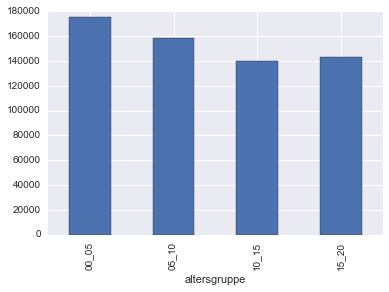

In [81]:
# plot the histogram of number of german people from 0 till 20 across all districts
tmp = data.query('alter_linke_seite < 20').groupby('altersgruppe').apply(lambda x: x.haeufigkeit.sum())
tmp.plot(kind = 'bar')